In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
sns.set_theme()

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/merge_peak_scores_downsampled"
data_path = os.path.join(data_dir, "scores.tsv")



# Per-Peak Visualizations

Now, I look into the distributions of several metrics across individual mouse peaks.

In [3]:

data = pd.read_csv(data_path, sep='\t', header=0)
data

chr_x  start_x    end_x                1    2_x 3_x       4_x  \
0             chr1  3121337  3121796   total_peak_140    588   .  12.41760   
1             chr1  3191533  3192041  total_peak_141a     36   .   2.48353   
2             chr1  3191533  3192041  total_peak_141b    335   .   8.60956   
3             chr1  3360964  3361276   total_peak_143    119   .   4.63592   
4             chr1  3670569  3670973   total_peak_146    394   .   7.10173   
...            ...      ...      ...              ...    ...  ..       ...   
159698  JH584304.1   101687   101902   total_peak_129   1212   .   3.24063   
159699  JH584304.1   103144   103422   total_peak_130   3552   .   5.33690   
159700  JH584304.1   103769   104115   total_peak_131  15200   .  12.45700   
159701  JH584304.1   104202   104357   total_peak_132   2185   .   4.17417   
159702  JH584304.1   109058   109443   total_peak_133    324   .   2.65558   

               5_x         6_x  summit_x  ...  contrib_counts_nlq  \
0         58.87260    56.37410       229  ...                 inf   
1          3.60957     1.94164       119  ...                 inf   
2         33.52660    31.23600       348  ...                 inf   
3         11.92300     9.94400       108  ...                 inf   
4         39.47270    37.12530       260  ...                 inf   
...            ...         ...       ...  ...                 ...   
159698   121.23100   118.43100       101  ...                 inf   
159699   355.22000   351.90000       164  ...                 inf   
159700  1520.09000  1514.58000       106  ...                 inf   
159701   218.51700   215.45800        81  ...                 inf   
159702    32.44900    30.17030       159  ...                 inf   

        contrib_counts_dist_pooled  ss_self_contrib_profiles_dist_mean  \
0                         0.286211                            0.328000   
1                         0.919361                            0.718068   
2                         0.919310                            0.718067   
3                         0.605921                            0.442381   
4                         0.402701                            0.699857   
...                            ...                                 ...   
159698                    0.871437                            1.011538   
159699                    0.814403                            0.987589   
159700                    0.764260                            0.853581   
159701                    0.746852                            0.816678   
159702                    0.844501                            1.077319   

        xs_self_contrib_profiles_dist_mean  cross_contrib_profiles_dist_mean  \
0                                 0.425077                          0.525296   
1                                 0.991365                          1.461560   
2                                 0.991296                          1.461526   
3                                 0.603830                          1.190001   
4                                 0.667825                          0.842839   
...                                    ...                               ...   
159698                            1.050722                          1.339021   
159699                            0.997633                          1.303142   
159700                            0.631657                          0.976899   
159701                            0.599402                          0.934585   
159702                            0.960859                          1.433439   

        contrib_profiles_e_dist  contrib_profiles_nlp  contrib_profiles_nlq  \
0                      0.545450                   inf                   inf   
1                      1.101675              2.100371              2.084132   
2                      1.101675              2.100371              2.084132   
3                      1.154899              2.100371              2.084132   
4 

## Mean vs Variance per peak

Here, we look at the means and variances of divergence between species for each mouse peak.  

The x axis for each subplot is the difference of the predicted log10 counts from the GP models and the mouse models, averaged over 5 folds. A positive value indicates a greater prediction from the GP models relative to the mouse models.

The y axis is the estimated standard deviation across folds of the divergence between the two species' count outputs. A higher standard deviation indicates higher variances across folds.    
The color indicates the significance of the difference between species for each peak, as evaluated using the Mann-Whitney U test on quantile-normalized predictions. I also looked into using DESeq also but I its assumptions are geared towards observed counts from experimental data and aren't really appropiate for analyzing predicted counts from models (more below).

Here, we see basically no correlation between mean and variance, which directly contradicts with the assumptions made by DESeq. The exceptions are mCM-1-3, Other-2, and pCM-3, though these seem to be due to technical issues (more later).

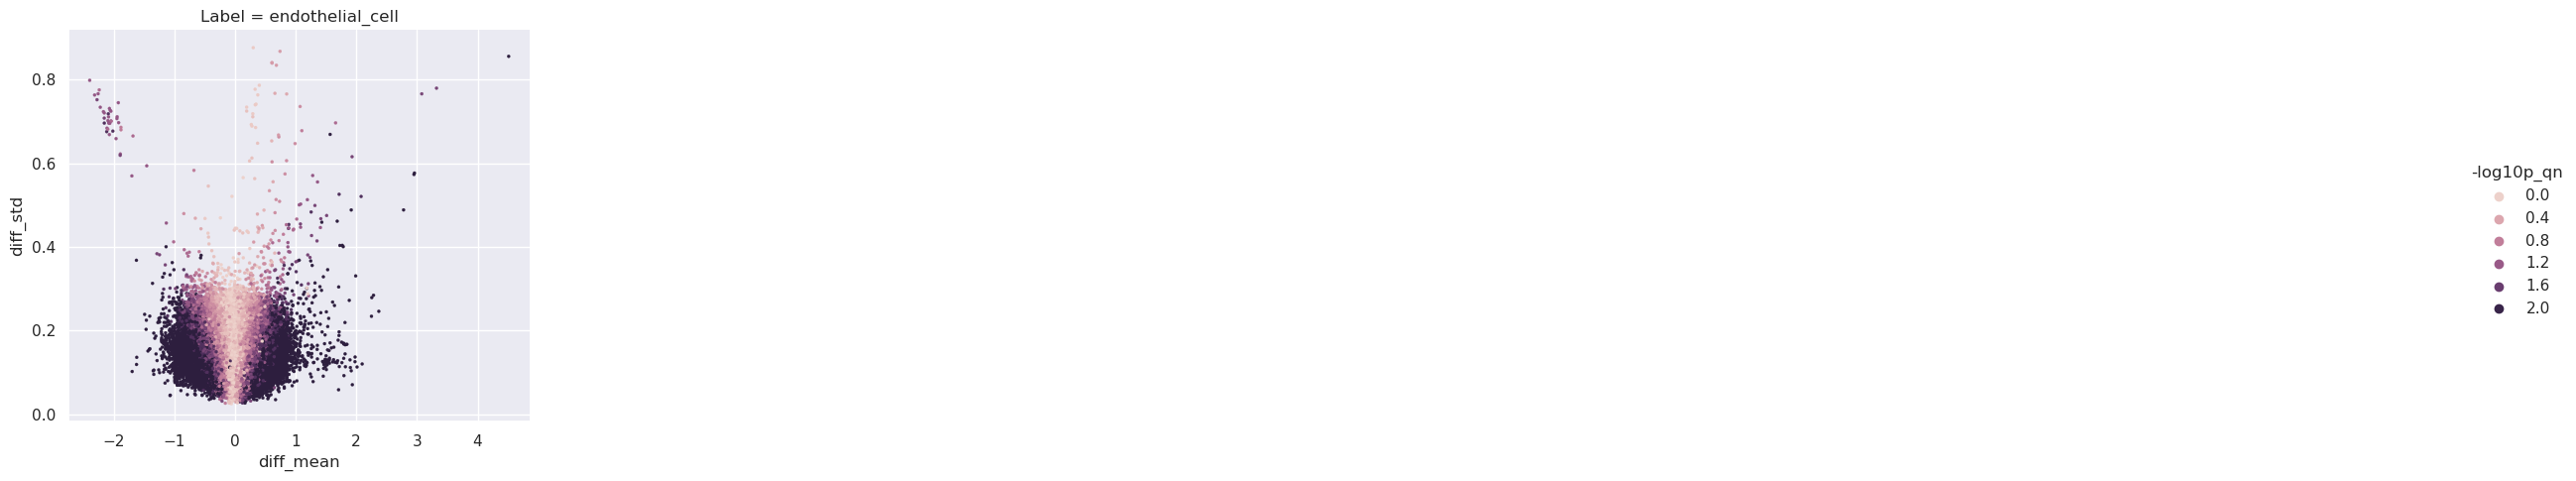

In [4]:
sns.relplot(data=data, x="diff_mean", y="diff_std", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Mouse vs. GP predictions

Next, we look at the mean predictions of the mouse and GP models on the mouse peaks.  

The x axis is the mean predicted log10 counts as predicted by the mouse models, averaged across 5 folds. The y axis is the mean predicted log10 counts as predicted by the GP models.

And as before, the color indicates the significance of the difference between species.

Note that within each species and each cell types, the predicted log counts are zero-centered across peaks to account for read depth differences across species. Thus, the intercept in the plots are always zero. 

For most cell types, the relationship between the axes is linear with a slope of 1. 

However, for some cell types, the slope is significantly different than 1 or even non-linear. I account for this when calculating significance by quantile-normalizing the predicted counts from each model. It is unclear whether this phenomenon is an artifact of training or represents real biology. 

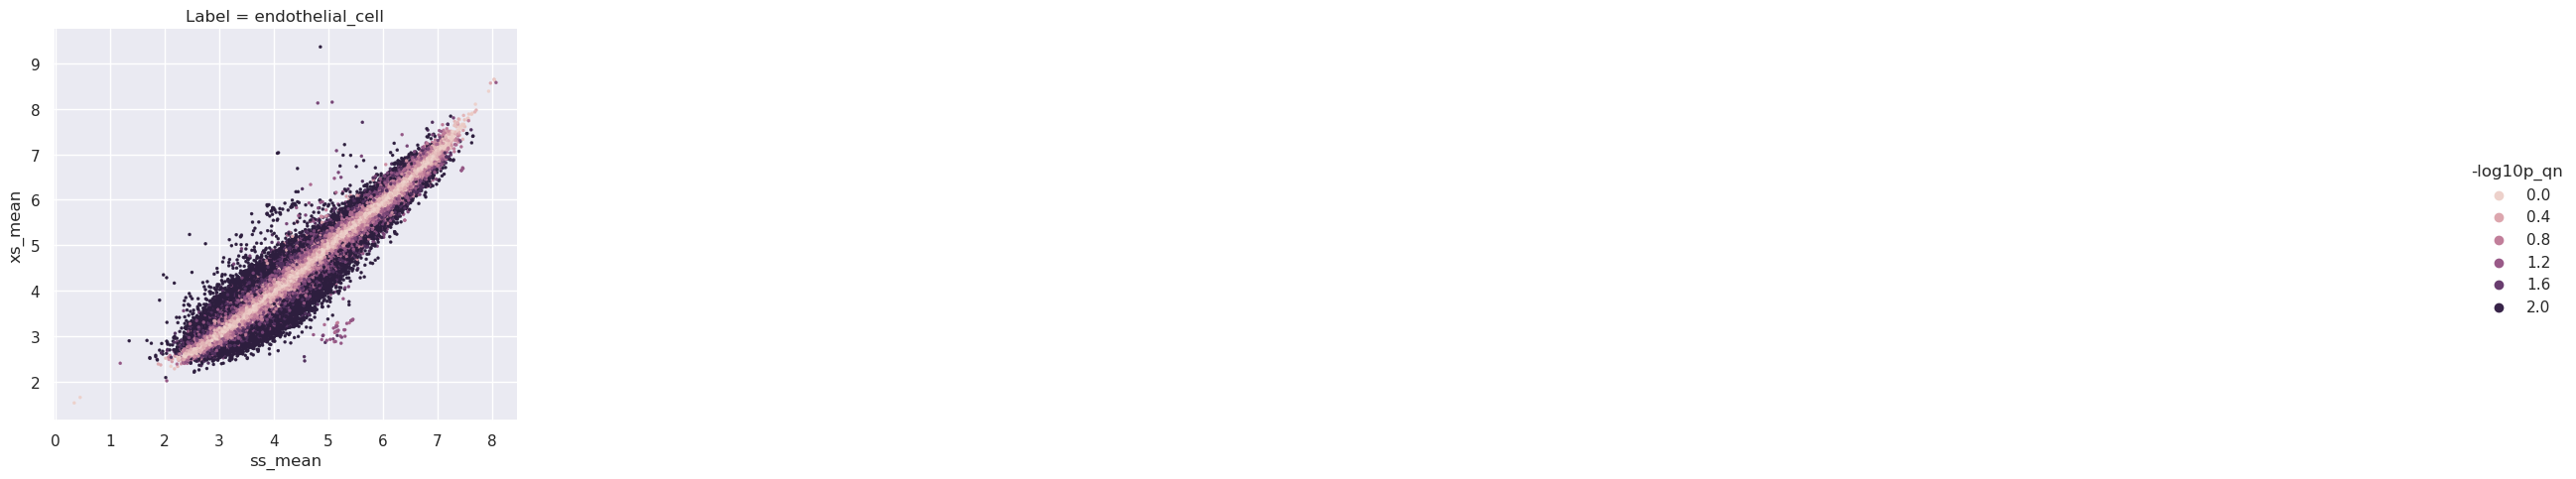

In [6]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

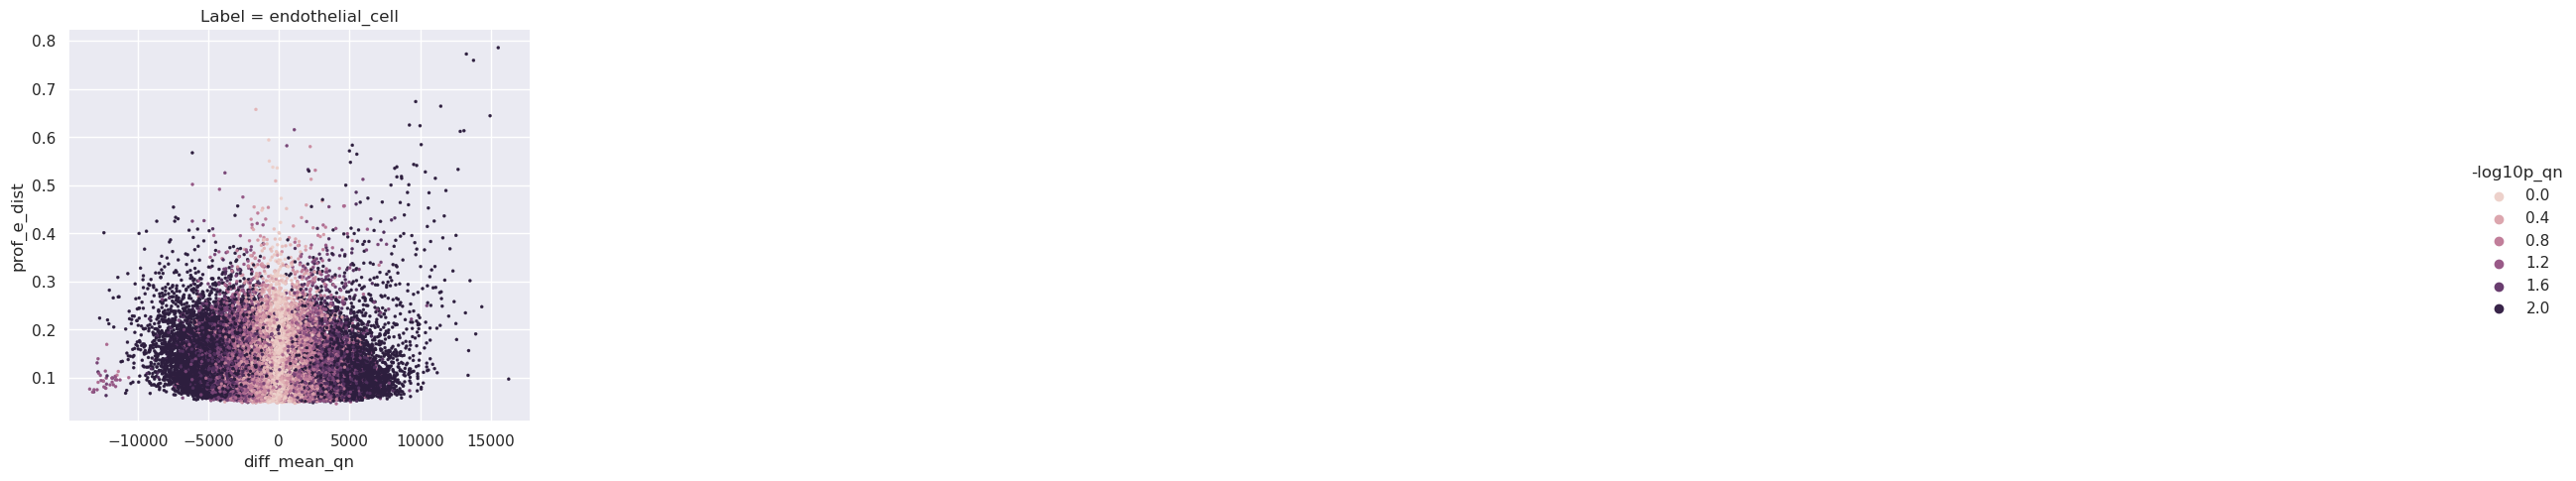

In [7]:
g = sns.relplot(data=data, x="diff_mean_qn", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

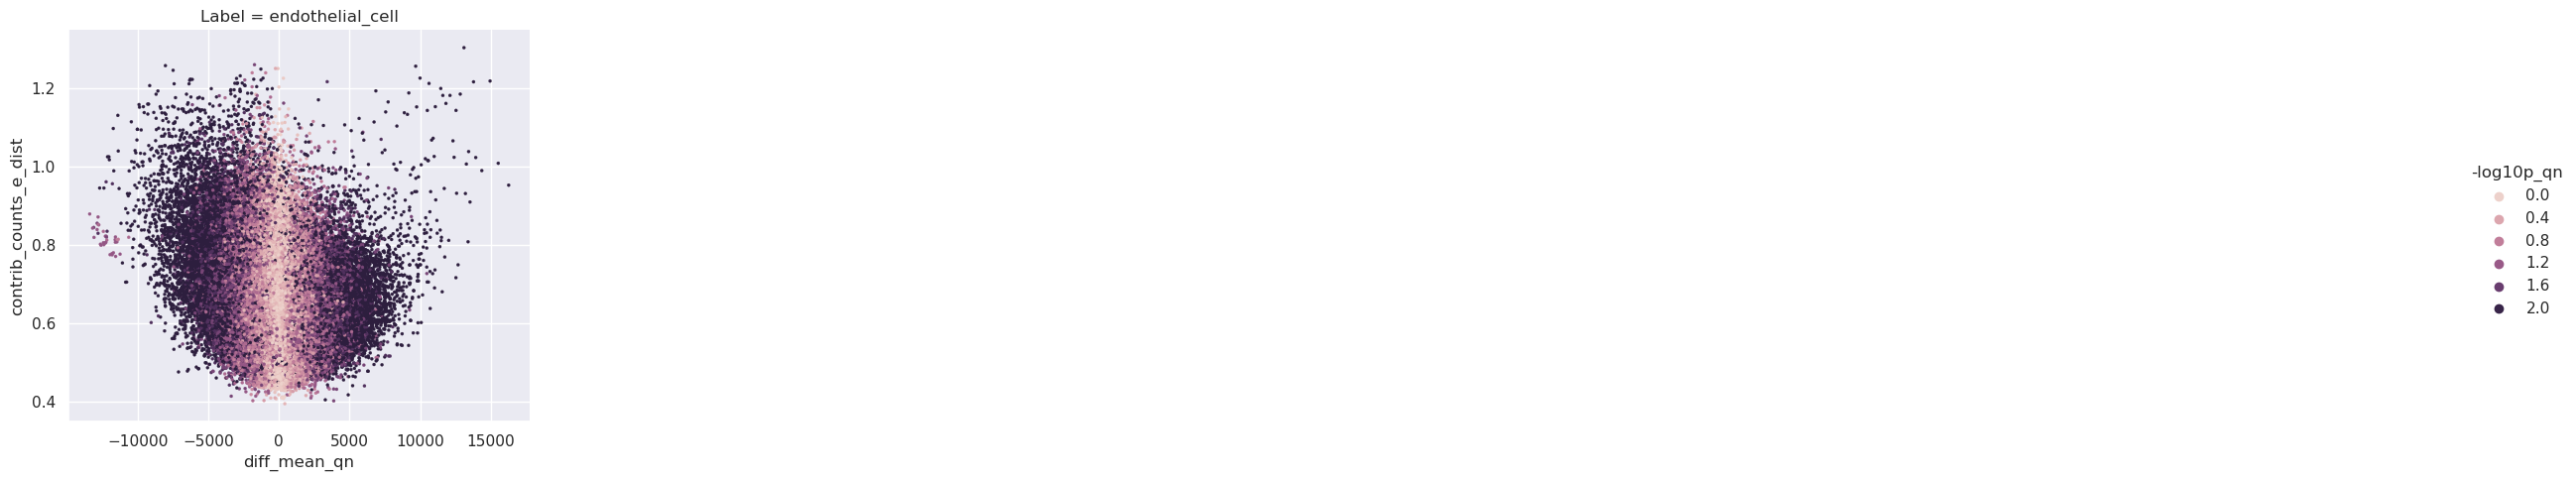

In [8]:
g = sns.relplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

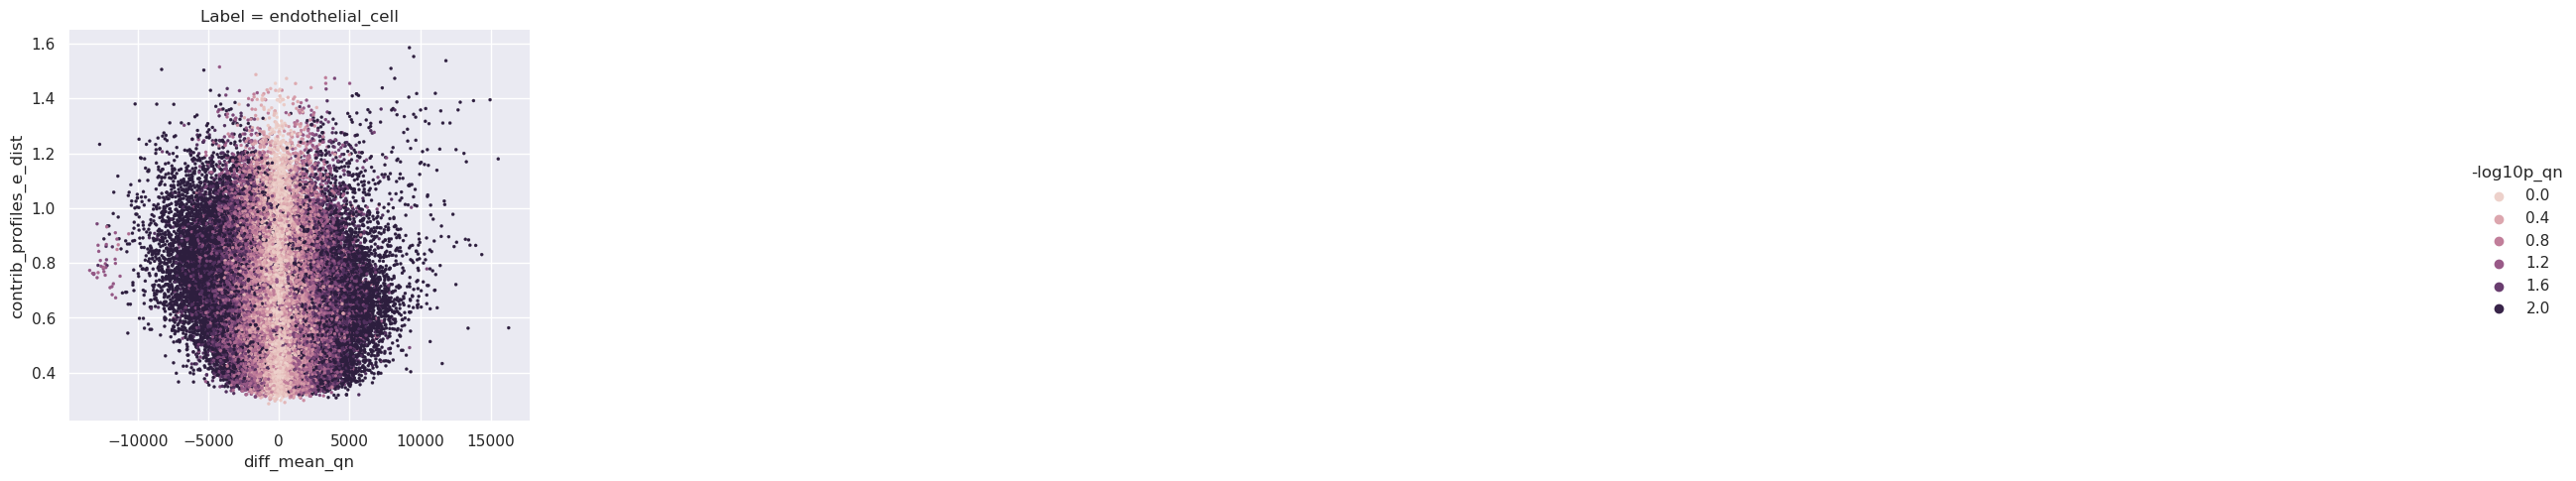

In [9]:
g = sns.relplot(data=data, x="diff_mean_qn", y="contrib_profiles_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

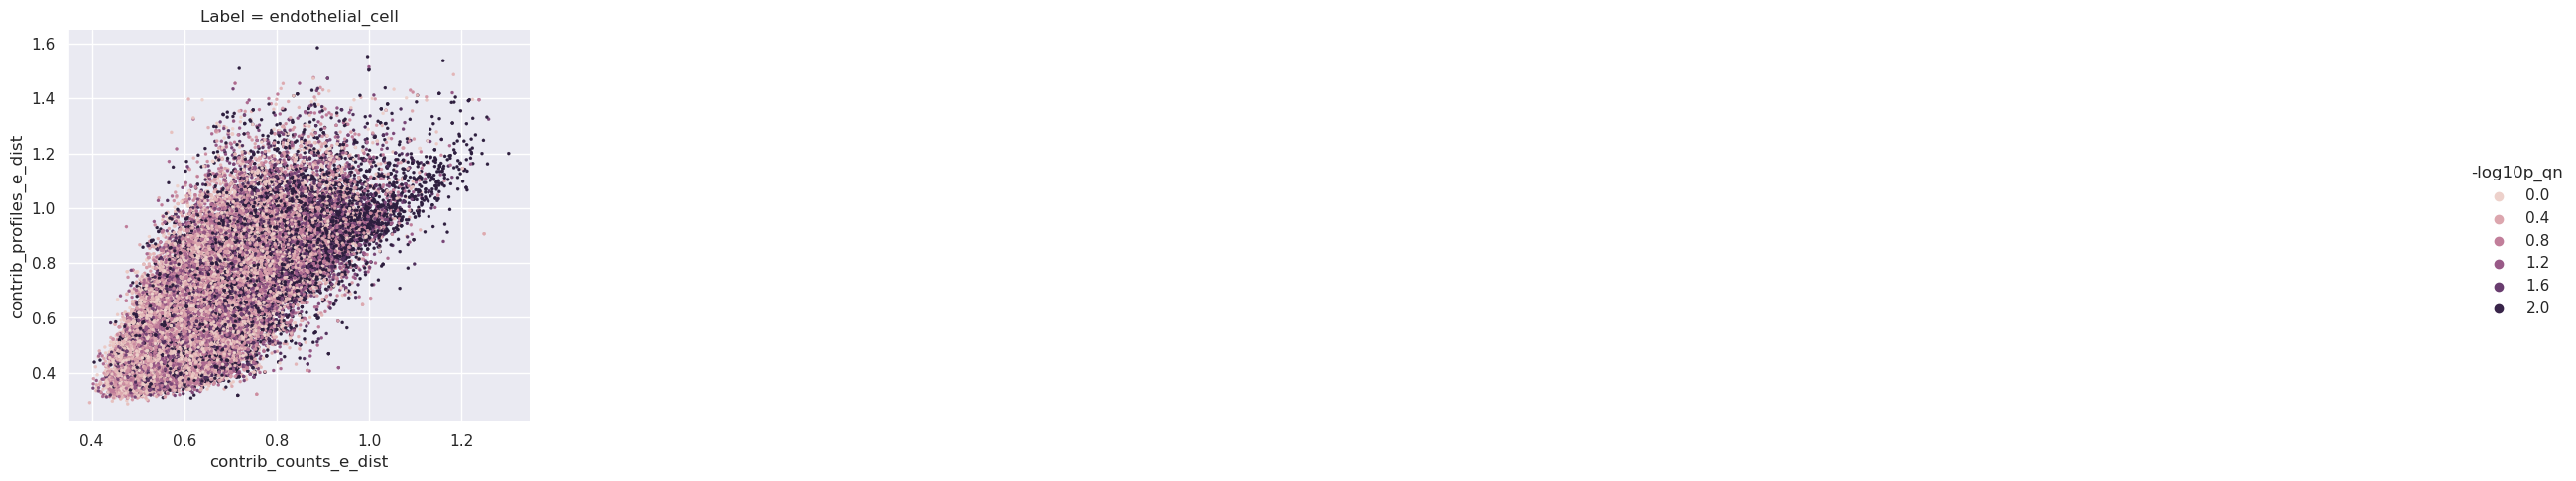

In [10]:
g = sns.relplot(data=data, x="contrib_counts_e_dist", y="contrib_profiles_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

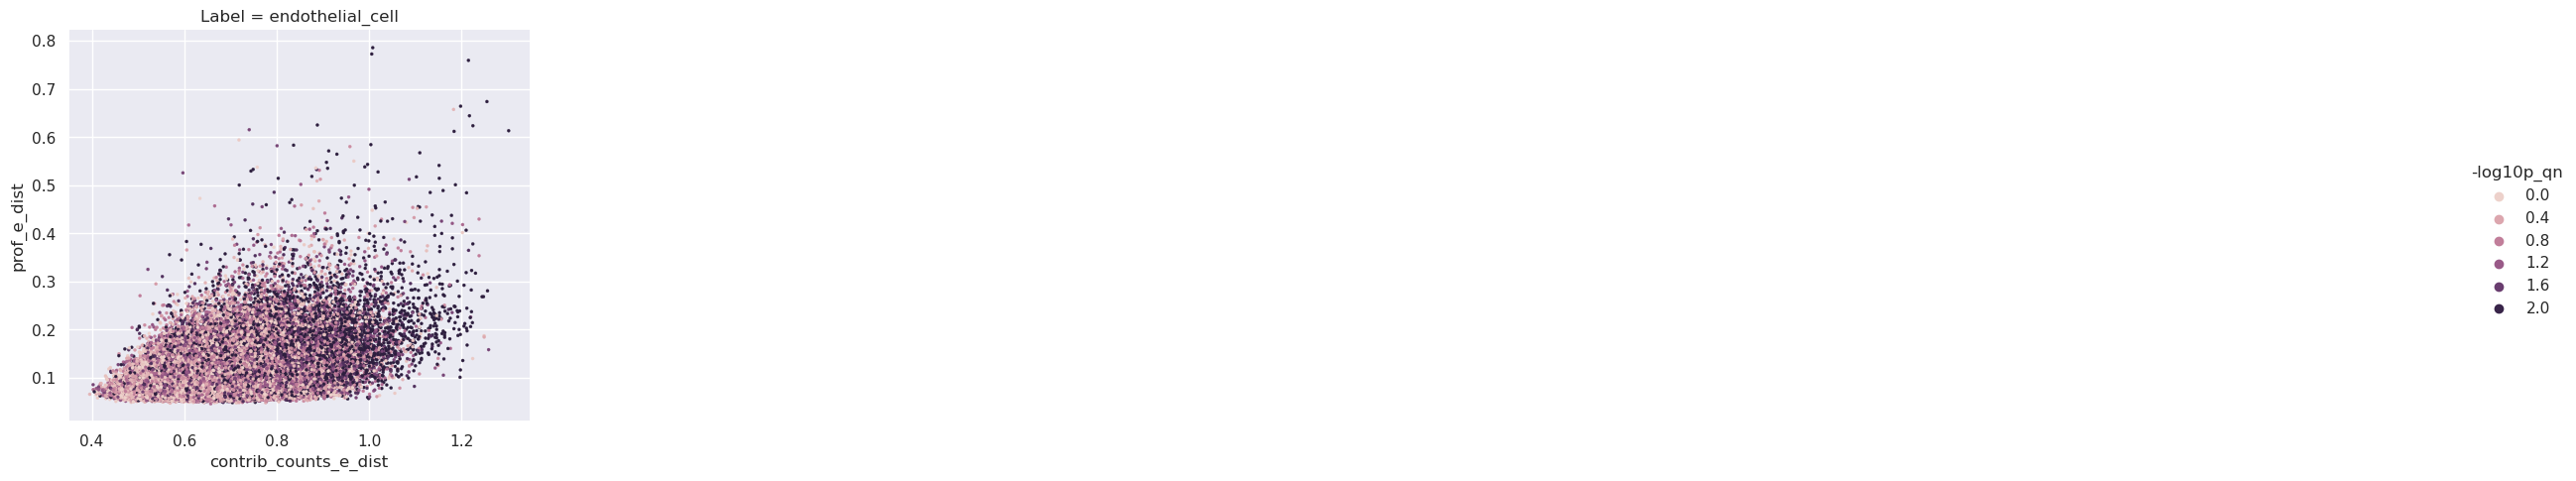

In [11]:
g = sns.relplot(data=data, x="contrib_counts_e_dist", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

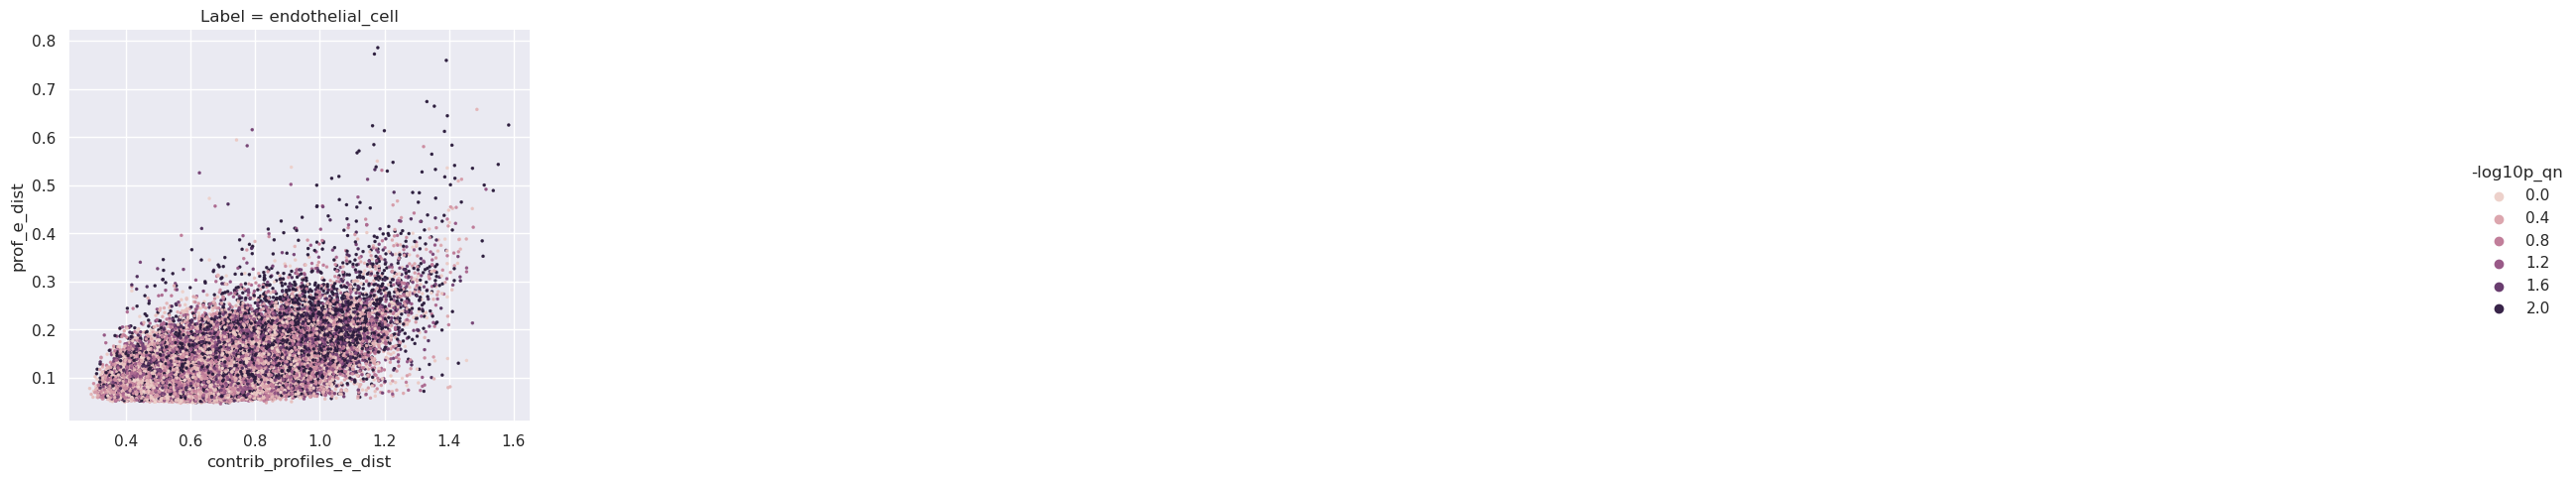

In [12]:
g = sns.relplot(data=data, x="contrib_profiles_e_dist", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


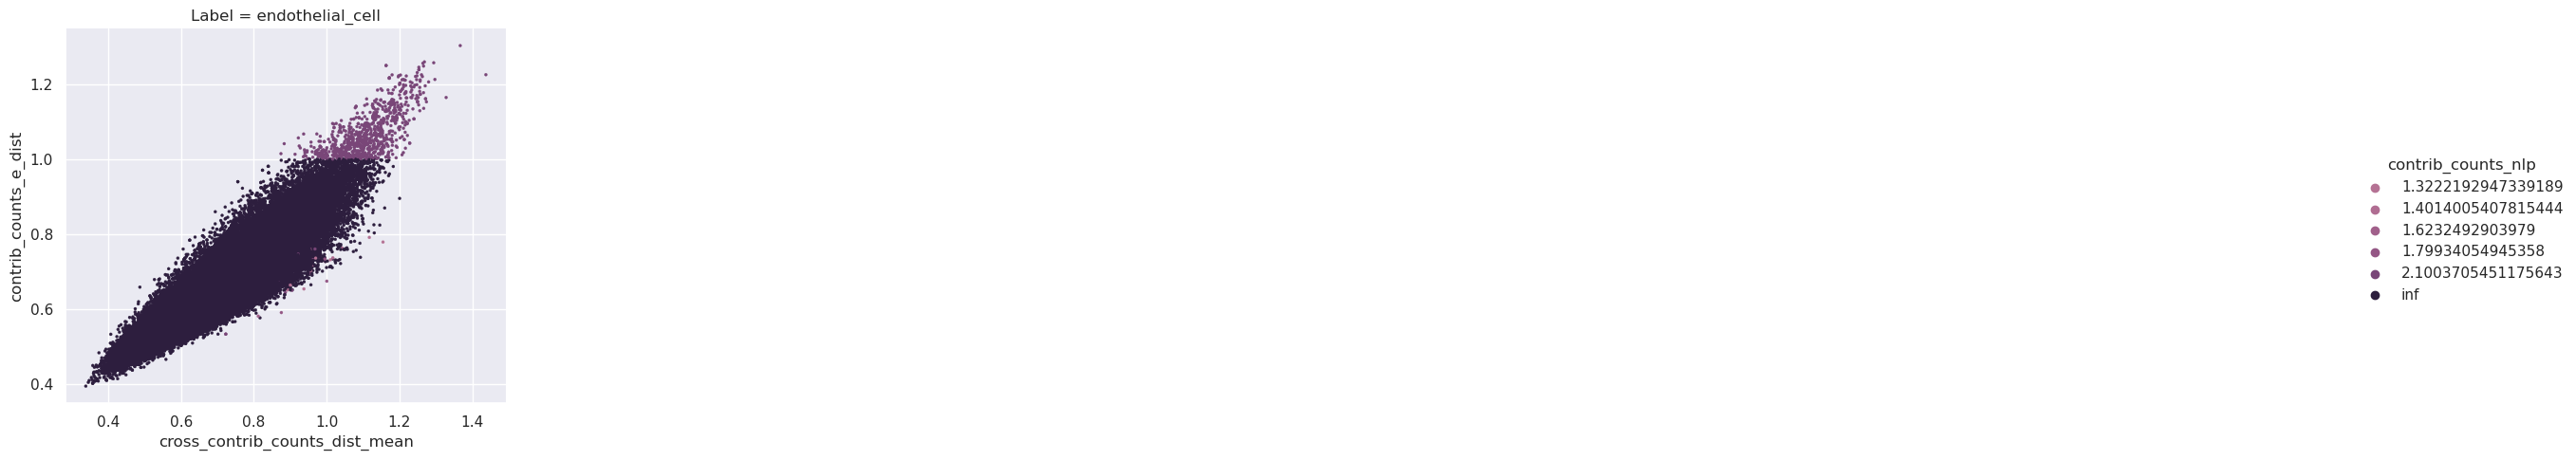

In [13]:
sns.relplot(data=data, x="cross_contrib_counts_dist_mean", y="contrib_counts_e_dist", col="Label", hue="contrib_counts_nlp", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


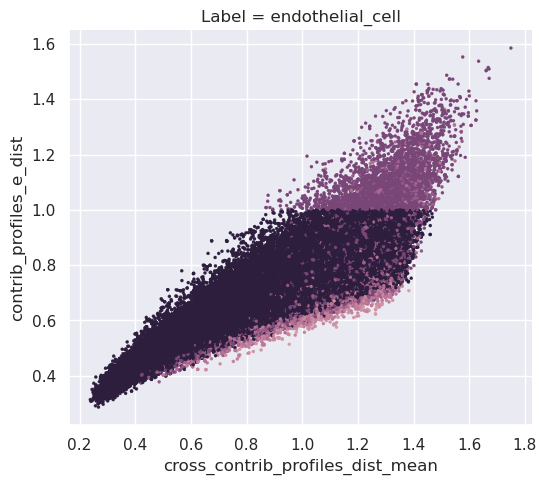

In [14]:
sns.relplot(data=data, x="cross_contrib_profiles_dist_mean", y="contrib_profiles_e_dist", col="Label", hue="contrib_profiles_nlp", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

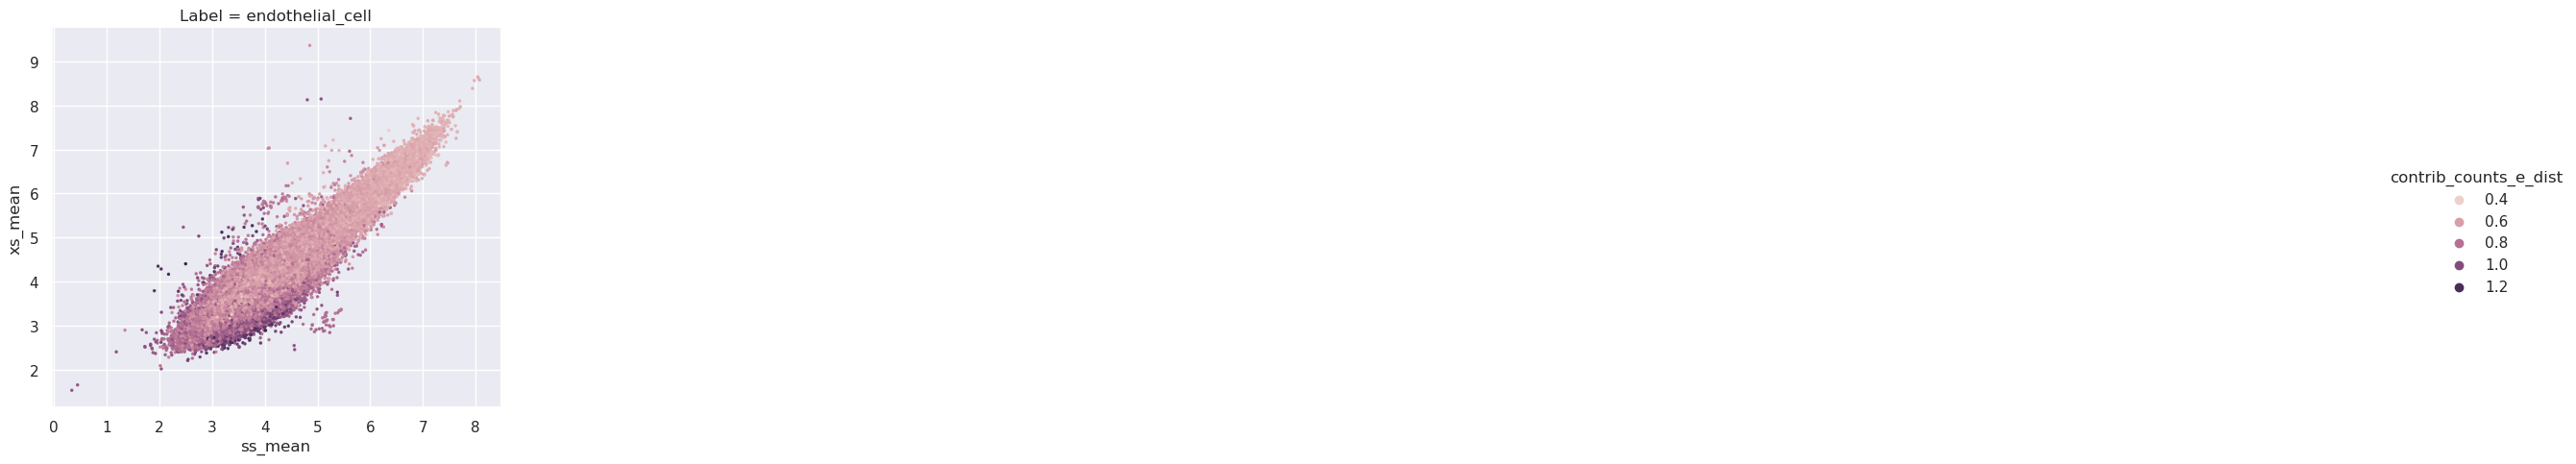

In [15]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="contrib_counts_e_dist", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

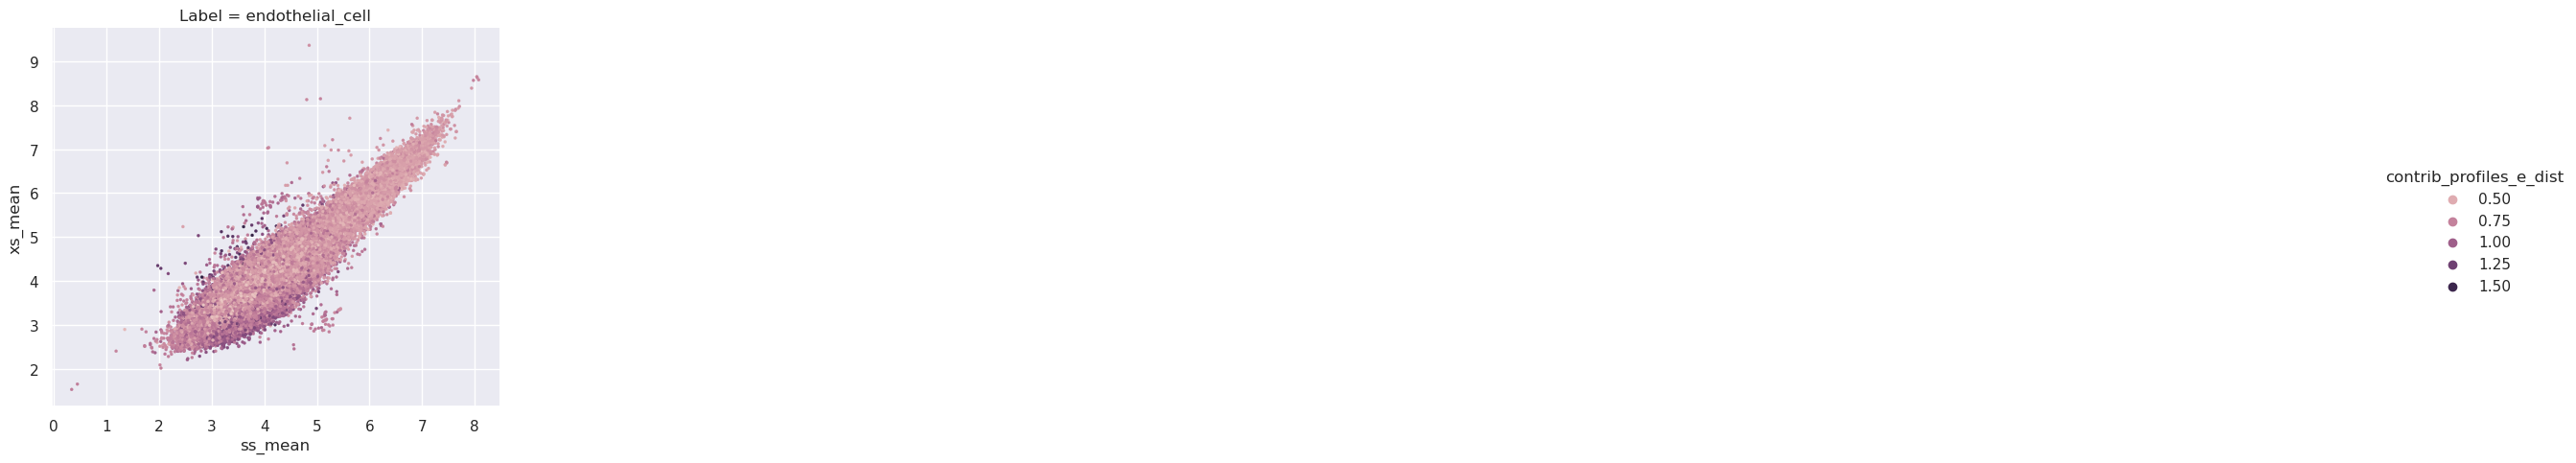

In [16]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="contrib_profiles_e_dist", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

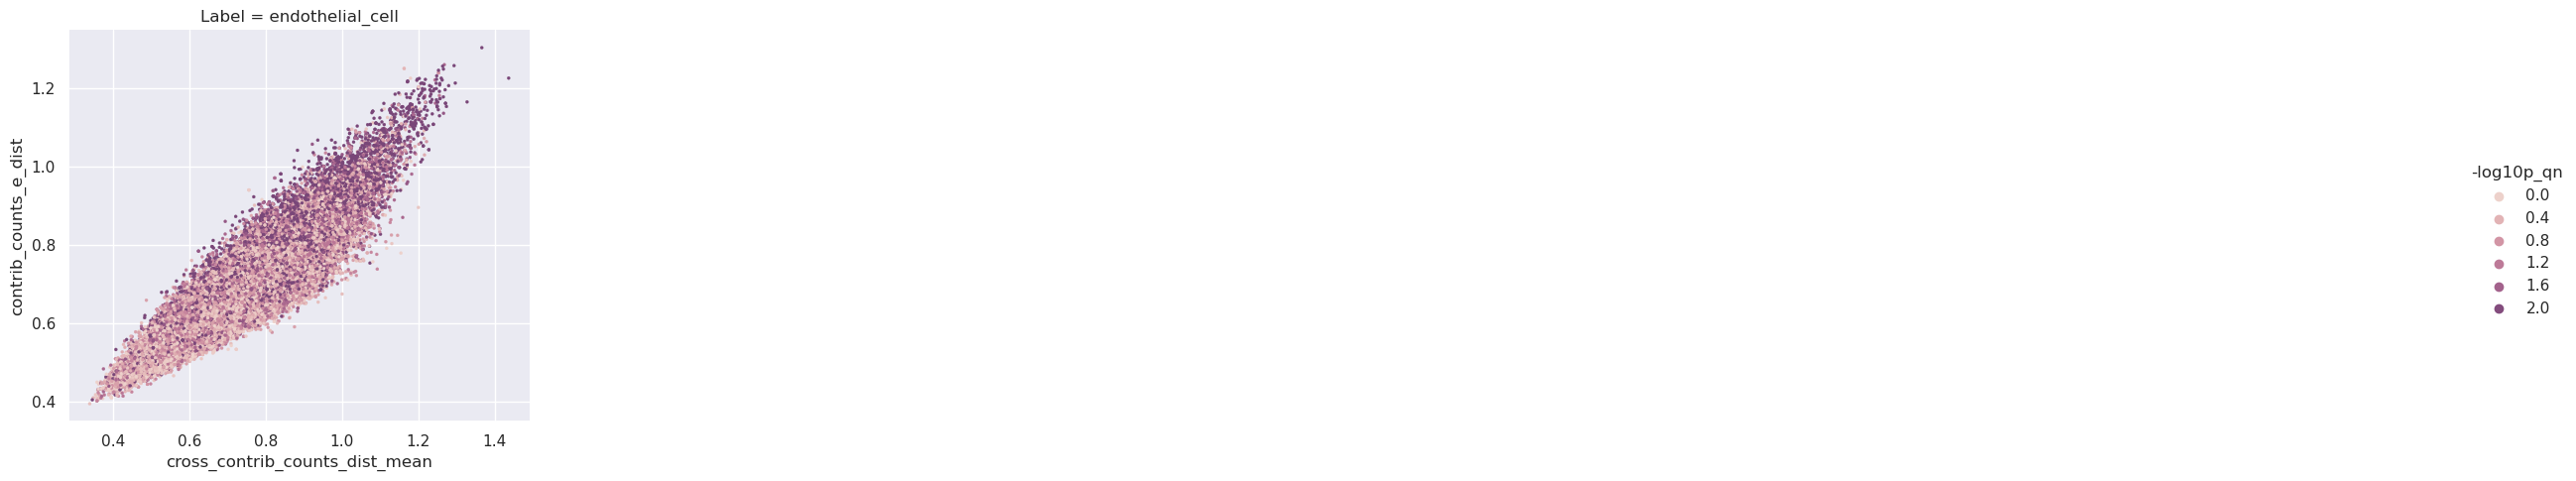

In [17]:
sns.relplot(data=data, x="cross_contrib_counts_dist_mean", y="contrib_counts_e_dist", col="Label", hue="-log10p_qn", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

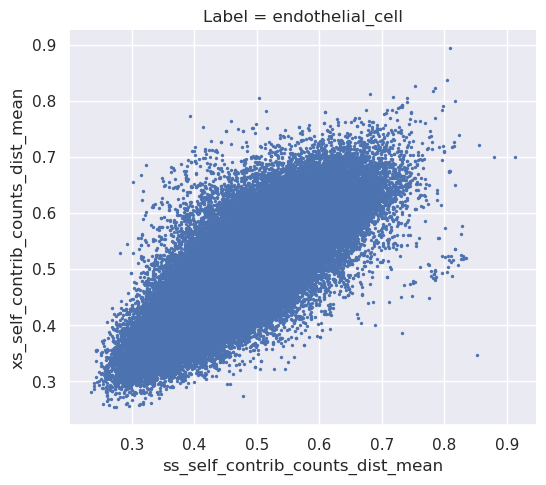

In [18]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


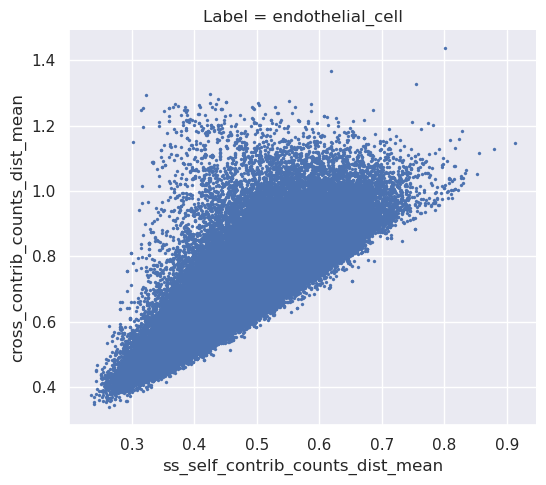

In [19]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="cross_contrib_counts_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


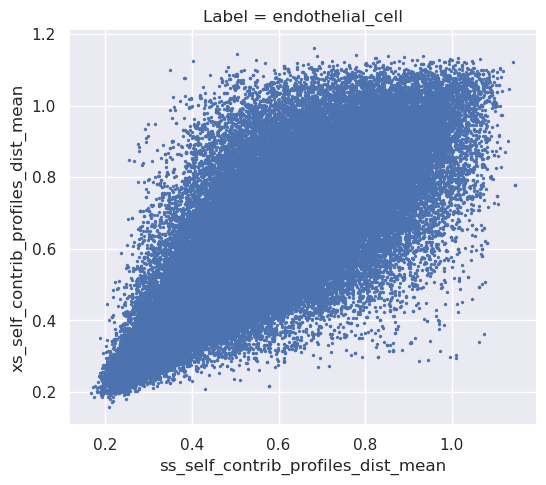

In [20]:
sns.relplot(data=data, x="ss_self_contrib_profiles_dist_mean", y="xs_self_contrib_profiles_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


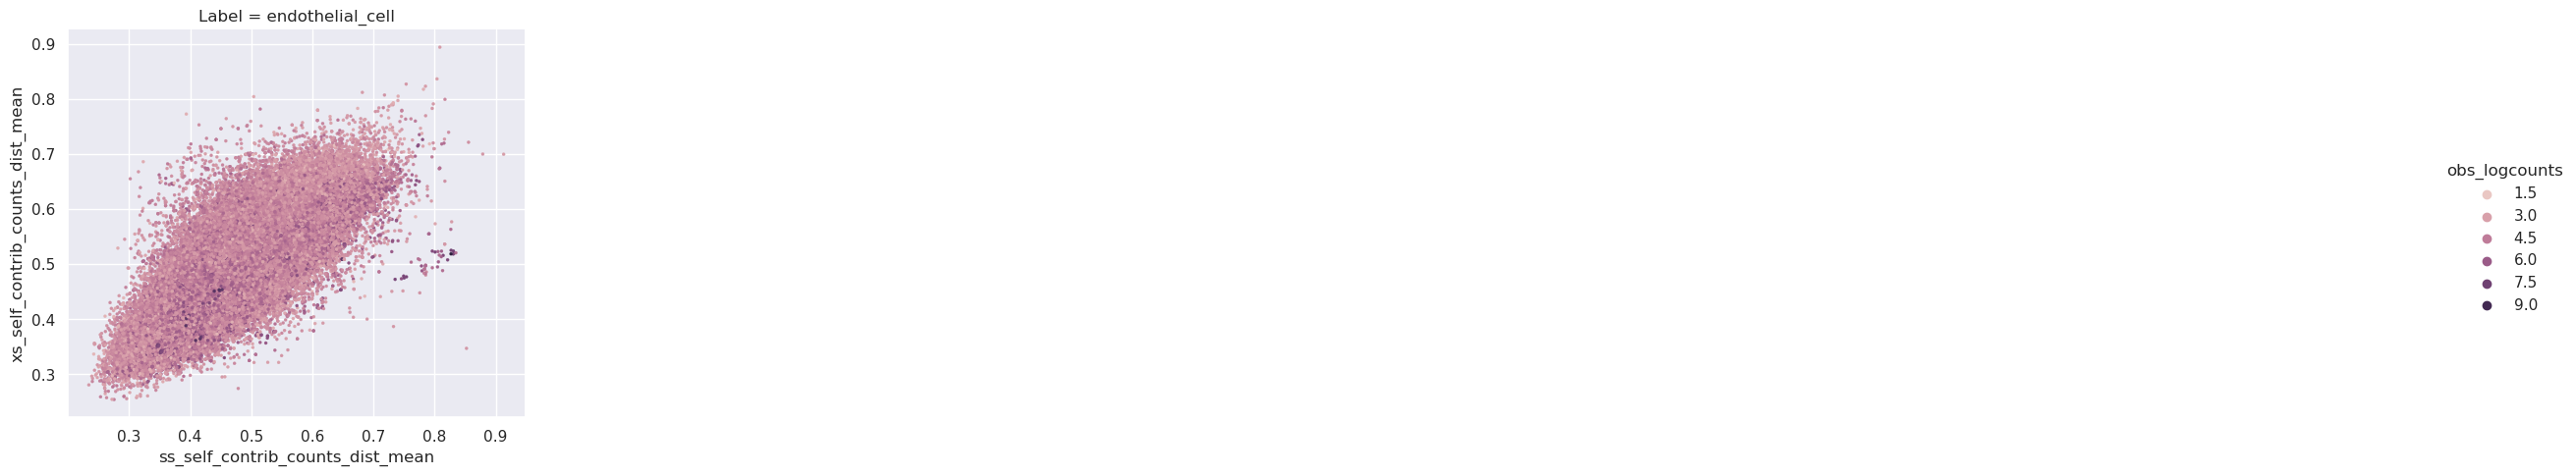

In [21]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="obs_logcounts", col_wrap=5, s=5, edgecolor=None)


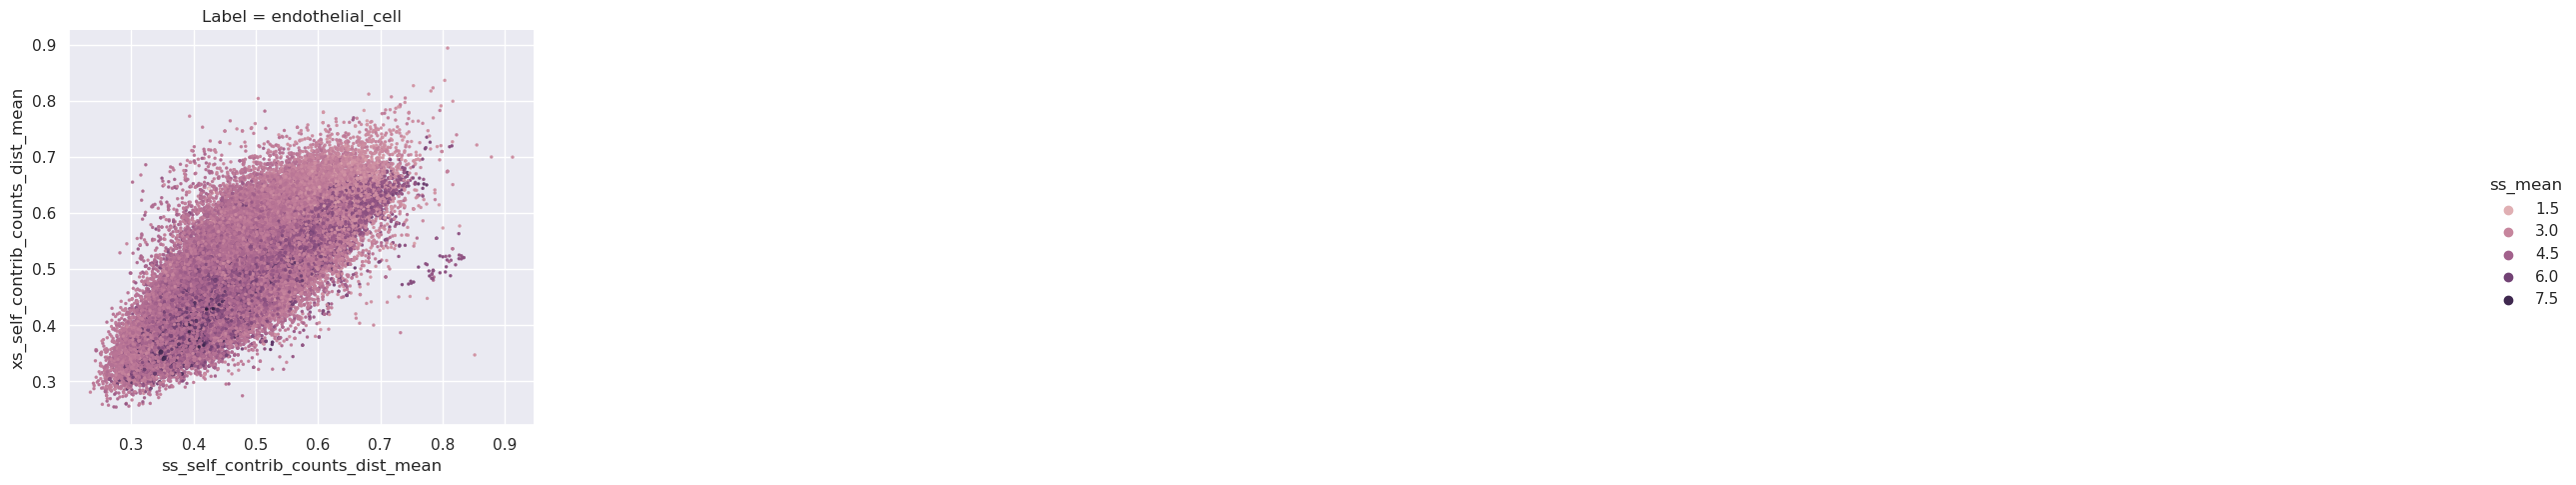

In [22]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="ss_mean", col_wrap=5, s=5, edgecolor=None)


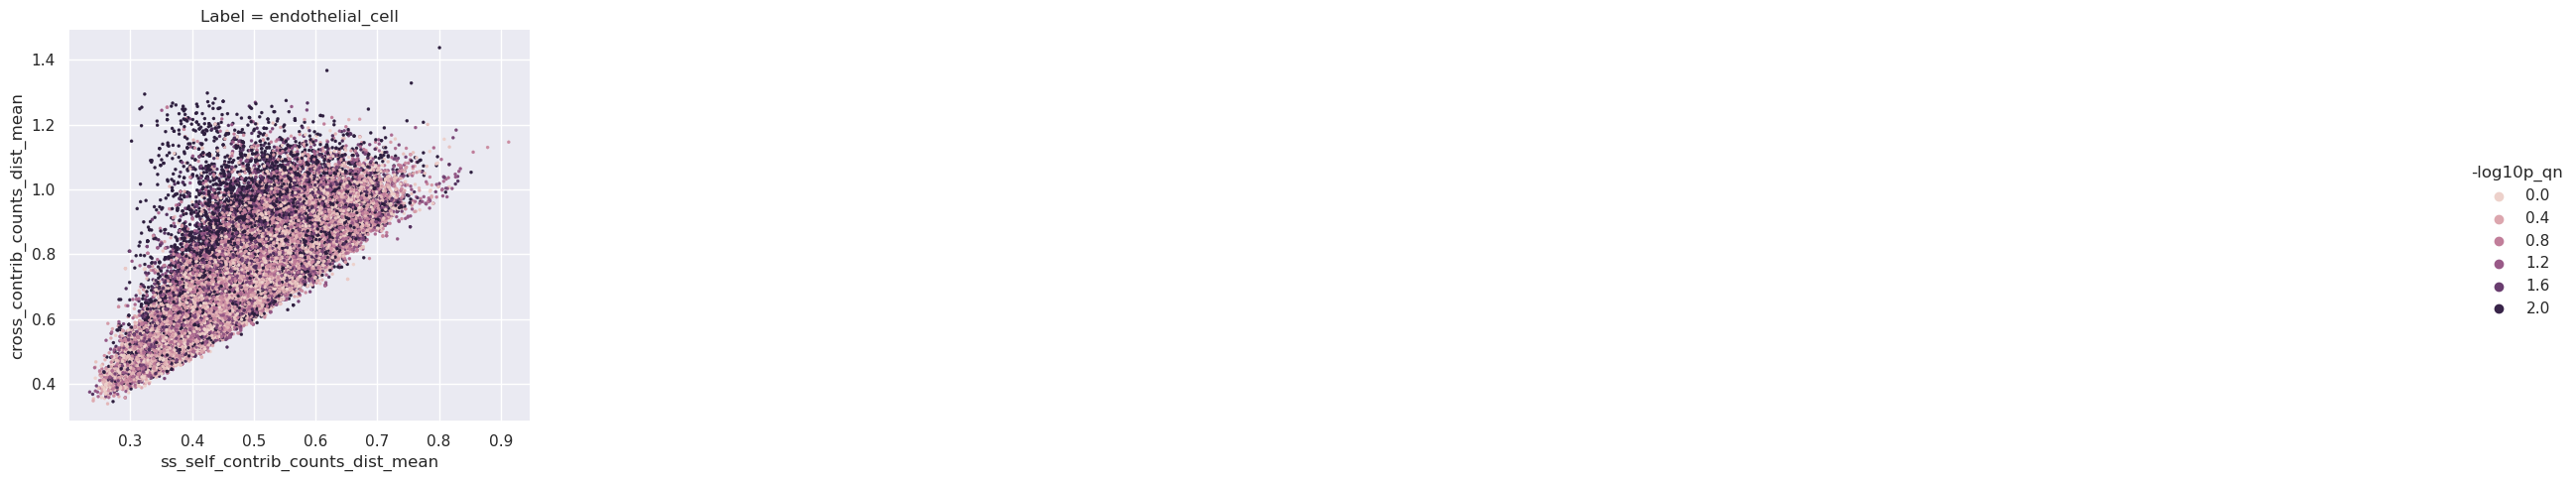

In [23]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="cross_contrib_counts_dist_mean", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)


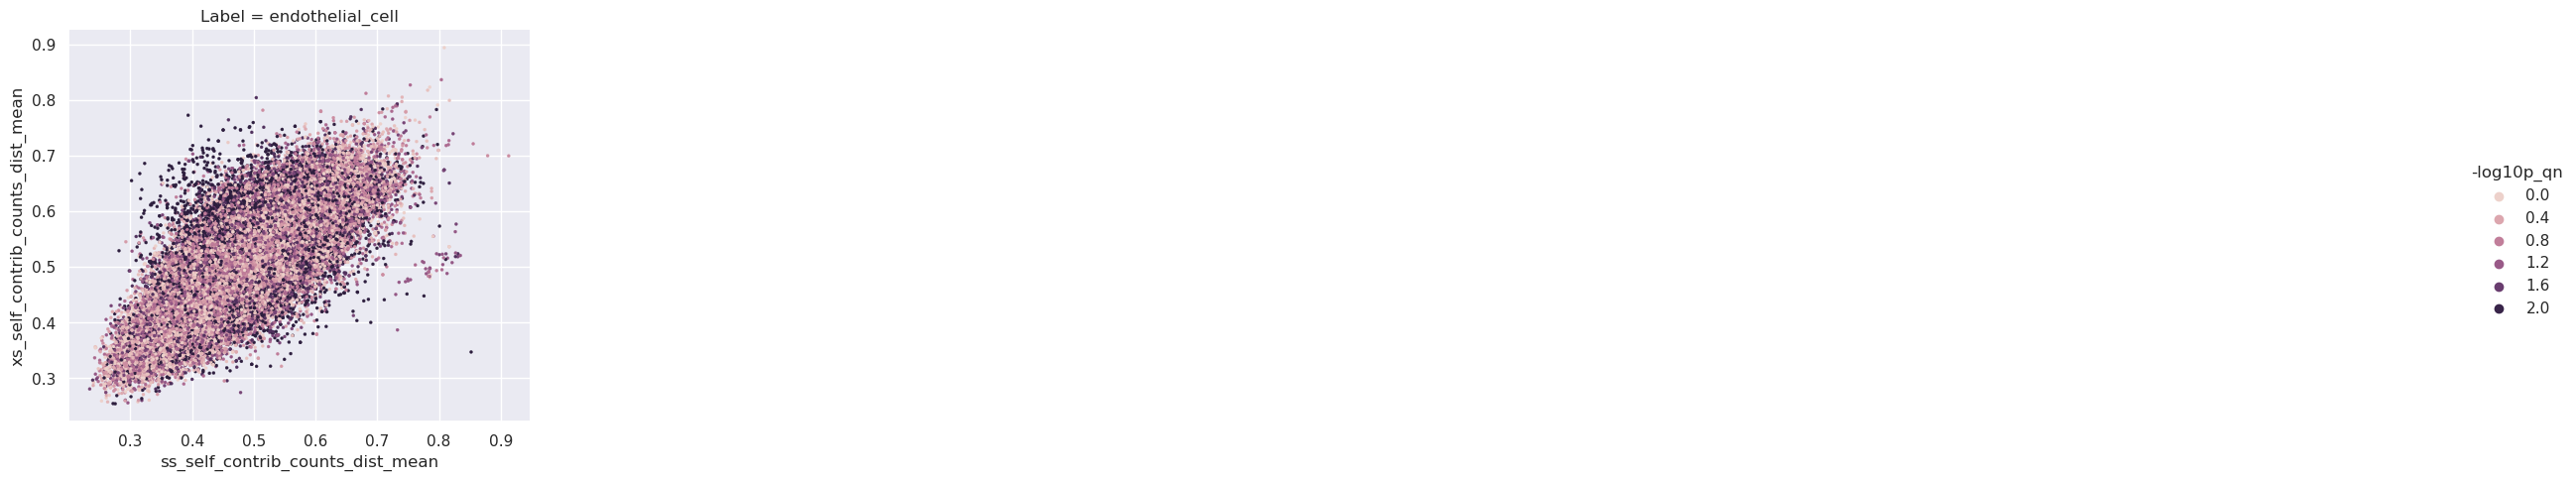

In [24]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)


In [25]:
from scipy import stats

grouped = data.groupby("Label")
header = ["Label", "SpearmanSame", "SpearmanCross", "SpearmanCrossPooled", "SpearmanObserved"]
records = []
for name, group in grouped:
    fold_0_ss = group[['fold_0_ss']].to_numpy()
    fold_1_ss = group[['fold_1_ss']].to_numpy()
    fold_0_xs = group[['fold_0_xs']].to_numpy()
    ss_mean = group[['ss_mean']].to_numpy()
    xs_mean = group[['xs_mean']].to_numpy()
    observed = group[['obs_logcounts']].to_numpy()
    corr_ss = stats.spearmanr(fold_0_ss, fold_1_ss).correlation
    corr_xs = stats.spearmanr(fold_0_ss, fold_0_xs).correlation
    corr_xs_pooled = stats.spearmanr(ss_mean, xs_mean).correlation
    corr_observed = stats.spearmanr(fold_0_ss, observed).correlation
    records.append([name, corr_ss, corr_xs, corr_xs_pooled, corr_observed])
    
corrs = pd.DataFrame.from_records(records, columns=header)
corrs

Label  SpearmanSame  SpearmanCross  SpearmanCrossPooled  \
0  endothelial_cell      0.920324       0.862903             0.919172   

   SpearmanObserved  
0          0.720768

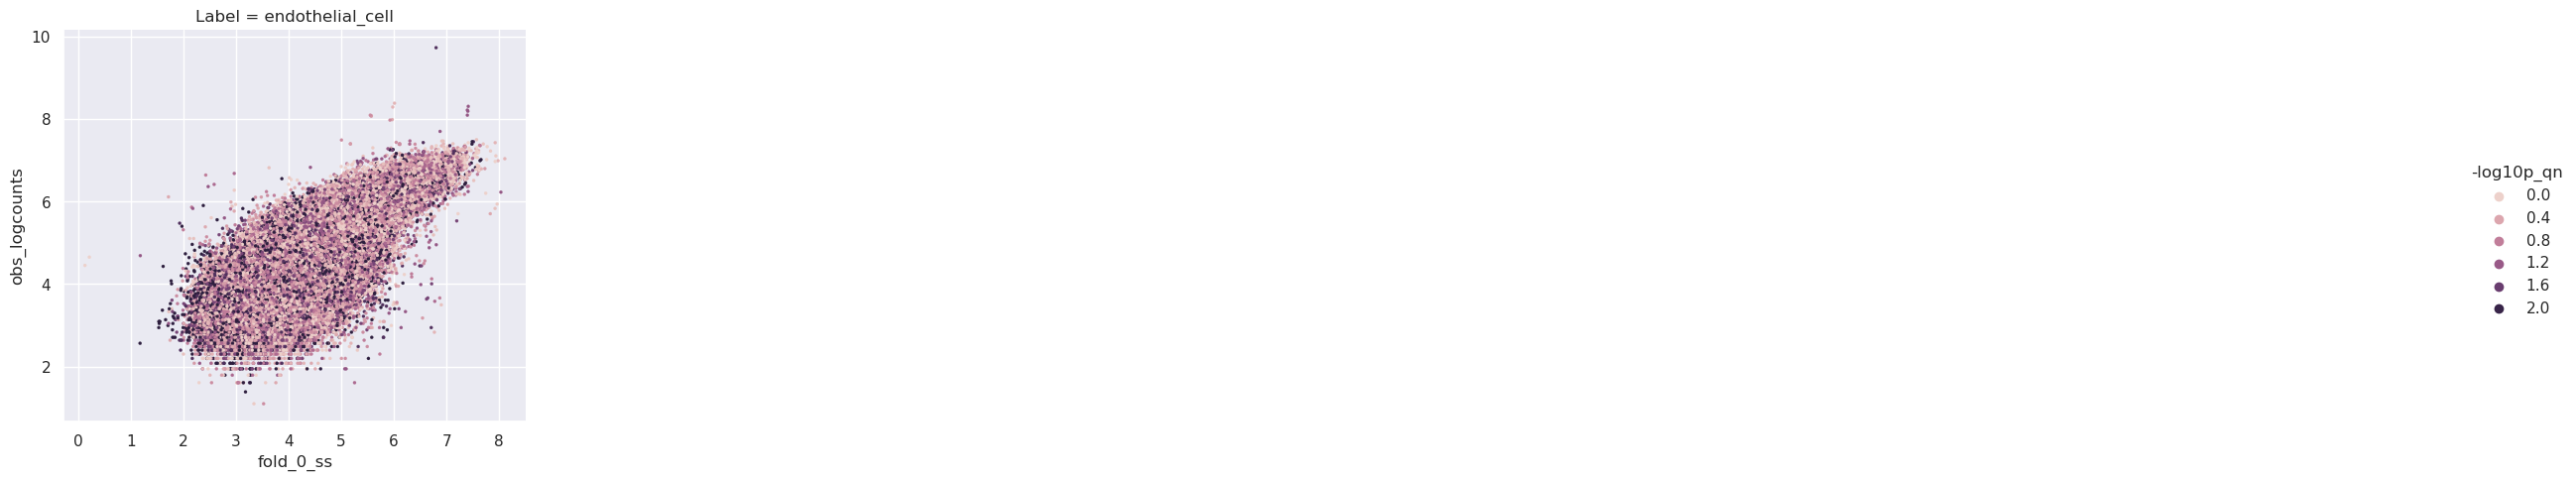

In [26]:
sns.relplot(data=data, x="fold_0_ss", y="obs_logcounts", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. True counts

We look a the fold 0 mouse model predictions compared the true counts on mouse peaks.  

The x axis is the predicted log10 counts as predicted by the mouse model. The y axis is the log1p true counts for the same peaks. Note that these values are on different scales but they are linearly related.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

## Predicted vs. predicted counts

We look a the fold 0 mouse model predictions compared the fold 1 mouse model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 1 mouse model.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

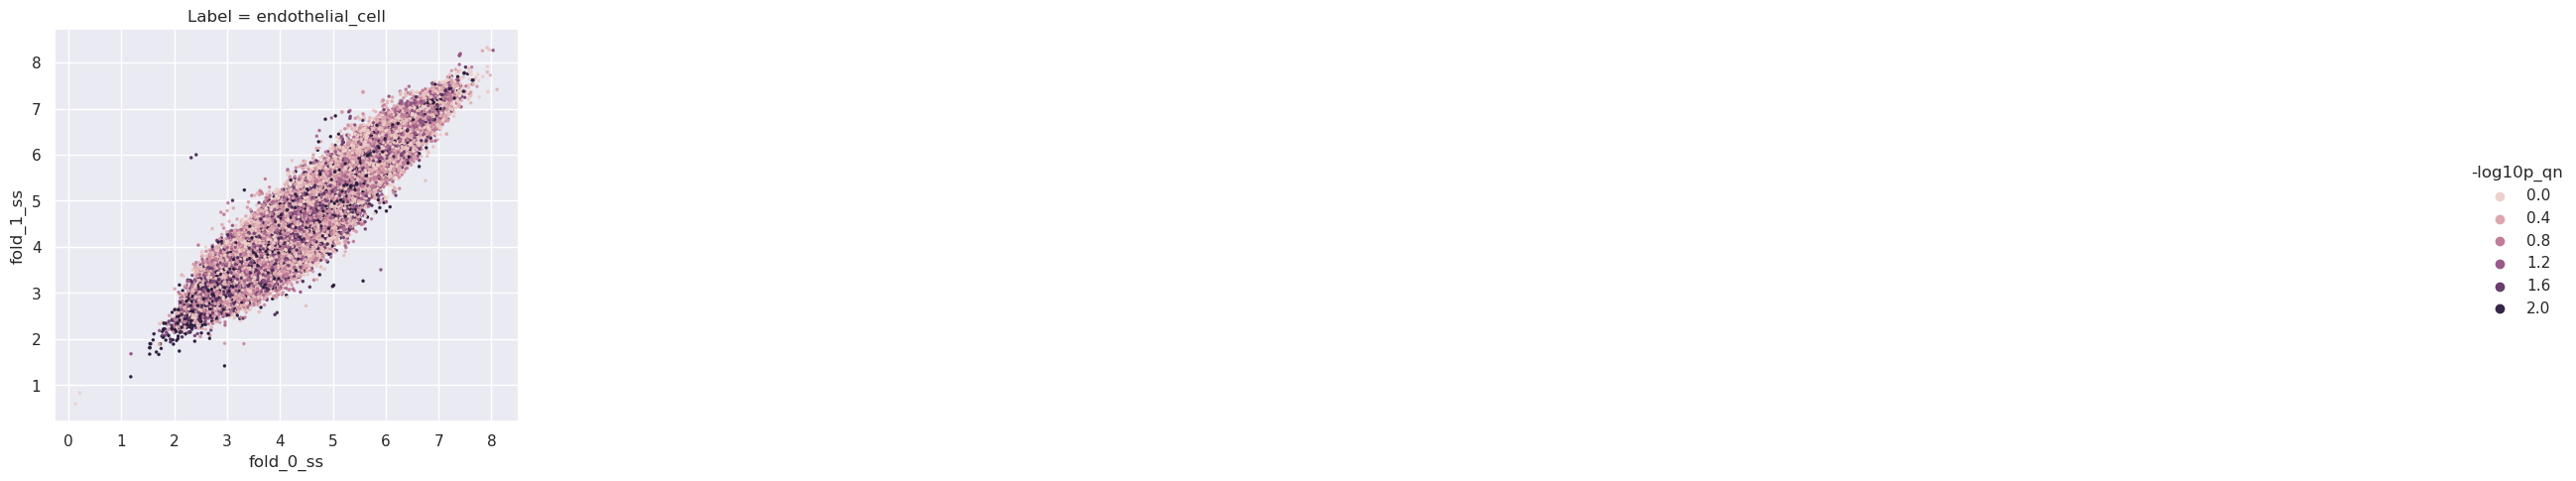

In [27]:
sns.relplot(data=data, x="fold_0_ss", y="fold_1_ss", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. cross-species predicted counts

We look a the fold 0 mouse model predictions compared the fold 0 GP model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 0 GP model.

And as before, the color indicates the significance of the difference between species.

As expected, significantly different peaks tend to be at the edges of the distribution

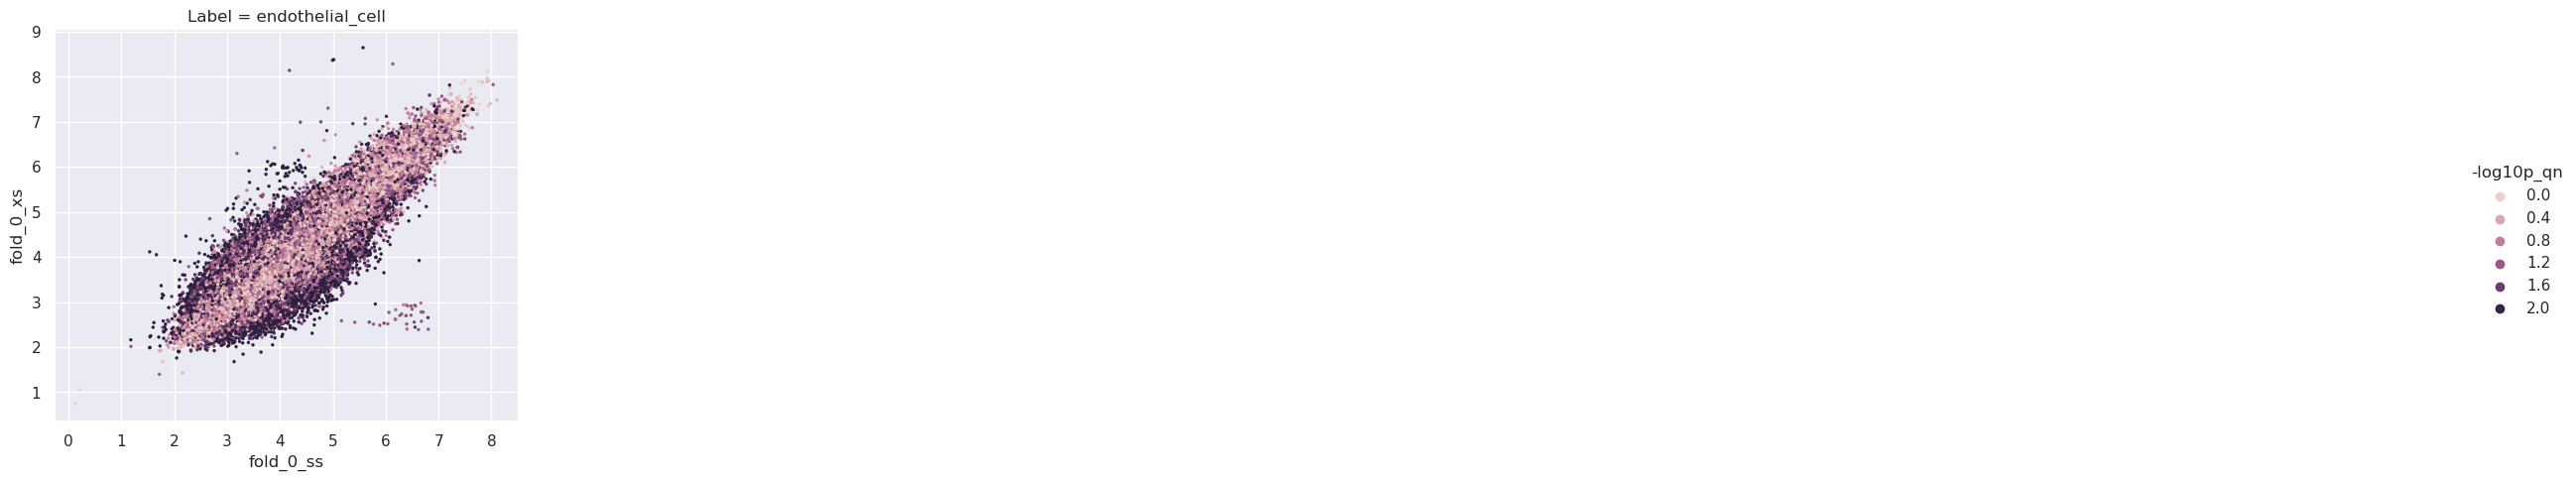

In [28]:
sns.relplot(data=data, x="fold_0_ss", y="fold_0_xs", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Quantitative cross-species prediction performance

Lastly, we look at the predictive cross_species performance for each cell type using spearman correlation across peaks.

SpearmanSame is the correlation of predicted counts from two folds of mouse model. This serves as an upper bound of cross-species predictive performance

SpearmanCross is the correlation of predicted counts from a mouse model with the predicted counts from the corresponding GP model. 

SpearmanObserved is the correlation of observed counts from a mouse model with true observed mouse counts.

We see that SpearmanCross is substantially closer to SpearmanSame than to SpearmanObserved, indicating that the predicted counts between two species correspond much more strongly than the predicted vs. true counts in the same species